In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#pd.set_option('max_rows', 99999)
#pd.set_option('max_colwidth', 400)

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


In [19]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud 


In [20]:
data=pd.read_csv(r"C:\Users\DELL\3D Objects\Data Science\Womens Clothing E-Commerce Reviews.csv",index_col=0)
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [21]:
data.rename(columns = {'Review Text':'text','Recommended IND':'recommend'}, inplace = True)
data.text=data.text.astype(str)

In [22]:
data.head()

,Clothing ID,Age,Title,text,Rating,recommend,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [23]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def cleaning(data):
    
    #1. Tokenization
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
        
    #2. Remove Punctuations
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemmatization
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
        
    return " ".join(text_cleaned)

In [25]:
data["text"] = data["text"].apply(cleaning)
data["text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text, dtype: object

In [26]:
positive_words =" ".join(data[data["recommend"] == 1].text).split()
positive_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'aded',
 'basket',
 'hte',
 'last',
 'mintue',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'darkler',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'mathced',
 'everythiing',
 'trying',
 'prefectly',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'msal

In [28]:
negative_words = " ".join(data[data["recommend"] == 0].text).split()
negative_words 

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'narrowing',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typically',

In [29]:
len(positive_words)

523824

In [30]:
len(negative_words)

118286

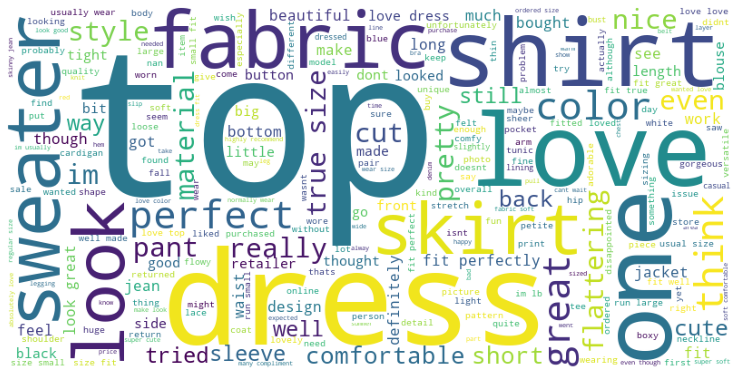

In [32]:
review_text = data["text"]
all_words = " ".join(review_text)
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(all_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

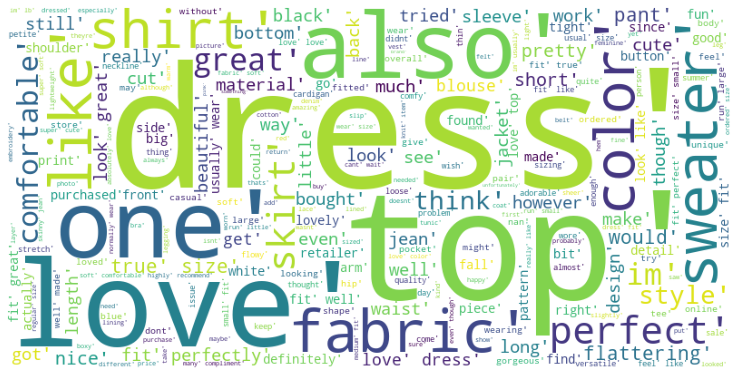

In [33]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(positive_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

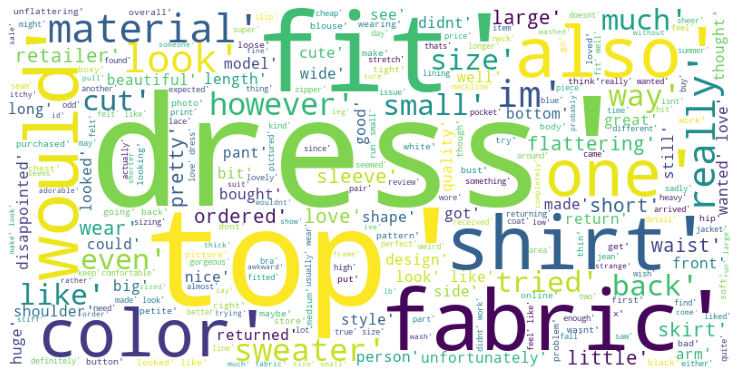

In [34]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(negative_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [36]:
counter_all = Counter(word_tokenize(all_words))
counter_all.most_common(10)

[('dress', 11352),
 ('fit', 10128),
 ('size', 9363),
 ('love', 8992),
 ('top', 8281),
 ('like', 7036),
 ('color', 6916),
 ('look', 6891),
 ('wear', 6521),
 ('great', 6101)]

In [37]:
data.head(5)

,Clothing ID,Age,Title,text,Rating,recommend,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,love dress sooo pretty happened find store im ...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,high hope dress really wanted work initially o...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses


In [40]:
X = data["text"].values
y = data["recommend"]
y.value_counts()

1    19314
0     4172
Name: recommend, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)
#Stratify makes sure that proportion of values remain same in train and test sets.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())


,aa,aaaaaaamazing,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,aame,ab,abbey,abby,...,zipper,zippered,zippie,zipping,zombie,zone,zoolanders,zoom,zooming,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
pd.DataFrame(X_test_count.toarray(), columns = vectorizer.get_feature_names())

,aa,aaaaaaamazing,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,aame,ab,abbey,abby,...,zipper,zippered,zippie,zipping,zombie,zone,zoolanders,zoom,zooming,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, average_precision_score

In [50]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model, X_test, y_test, cmap="plasma")
    print("Train Accuracy: ",accuracy_score(y_train, y_pred_train))
    print("Test Accuracy: ",accuracy_score(y_test, y_pred))

In [51]:
from sklearn.linear_model import LogisticRegression

logreg_count = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = 'balanced', random_state = 101)
logreg_count.fit(X_train_count,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

Logistic-Regression_Count Model
------------------
[[ 697  138]
 [ 488 3375]]
Test_Set
              precision    recall  f1-score   support

           0       0.59      0.83      0.69       835
           1       0.96      0.87      0.92      3863

    accuracy                           0.87      4698
   macro avg       0.77      0.85      0.80      4698
weighted avg       0.89      0.87      0.88      4698

Train_Set
              precision    recall  f1-score   support

           0       0.65      0.91      0.76      3337
           1       0.98      0.89      0.93     15451

    accuracy                           0.90     18788
   macro avg       0.81      0.90      0.85     18788
weighted avg       0.92      0.90      0.90     18788

Train Accuracy:  0.8965296998083884
Test Accuracy:  0.866751809280545


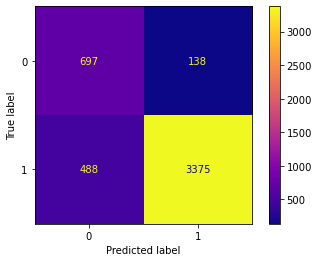

In [52]:
print("Logistic-Regression_Count Model")
print ("------------------")
eval(logreg_count, X_train_count, X_test_count)

In [58]:
from sklearn.svm import LinearSVC
svc_count = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)  
svc_count.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC_Count Model
---------------
[[ 694  141]
 [ 487 3376]]
Test_Set
              precision    recall  f1-score   support

           0       0.59      0.83      0.69       835
           1       0.96      0.87      0.91      3863

    accuracy                           0.87      4698
   macro avg       0.77      0.85      0.80      4698
weighted avg       0.89      0.87      0.87      4698

Train_Set
              precision    recall  f1-score   support

           0       0.65      0.91      0.76      3337
           1       0.98      0.90      0.94     15451

    accuracy                           0.90     18788
   macro avg       0.82      0.90      0.85     18788
weighted avg       0.92      0.90      0.90     18788

Train Accuracy:  0.8977538854588035
Test Accuracy:  0.8663260962111536


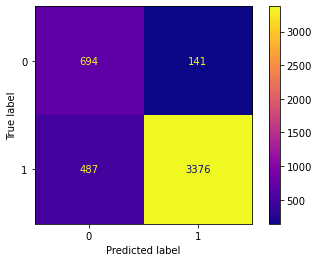

In [59]:
print("SVC_Count Model")
print("---------------")
eval(svc_count, X_train_count, X_test_count)

Ada_Count Model
---------------
[[ 475  360]
 [ 209 3654]]
Test_Set
              precision    recall  f1-score   support

           0       0.69      0.57      0.63       835
           1       0.91      0.95      0.93      3863

    accuracy                           0.88      4698
   macro avg       0.80      0.76      0.78      4698
weighted avg       0.87      0.88      0.87      4698

Train_Set
              precision    recall  f1-score   support

           0       0.80      0.65      0.72      3337
           1       0.93      0.97      0.95     15451

    accuracy                           0.91     18788
   macro avg       0.86      0.81      0.83     18788
weighted avg       0.91      0.91      0.91     18788

Train Accuracy:  0.9092505854800936
Test Accuracy:  0.878884631758195


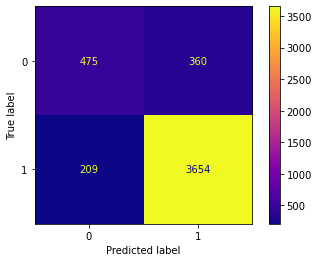

In [60]:
from sklearn.ensemble import AdaBoostClassifier

ada_count = AdaBoostClassifier(n_estimators = 500, random_state = 101)
ada_count.fit(X_train_count, y_train)
print("Ada_Count Model")
print("---------------")
eval(ada_count, X_train_count, X_test_count)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_count = AdaBoostClassifier(n_estimators = 500, random_state = 101)
ada_count.fit(X_train_count, y_train)
print("Ada_Count Model")
print("---------------")
eval(ada_count, X_train_count, X_test_count)

Random_Count Model Estimator  50
---------------
[[ 609  226]
 [ 564 3299]]
Test_Set
              precision    recall  f1-score   support

           0       0.52      0.73      0.61       835
           1       0.94      0.85      0.89      3863

    accuracy                           0.83      4698
   macro avg       0.73      0.79      0.75      4698
weighted avg       0.86      0.83      0.84      4698

Train_Set
              precision    recall  f1-score   support

           0       0.59      0.83      0.69      3337
           1       0.96      0.88      0.92     15451

    accuracy                           0.87     18788
   macro avg       0.78      0.85      0.80     18788
weighted avg       0.89      0.87      0.88     18788

Train Accuracy:  0.8692782627208857
Test Accuracy:  0.831843337590464
Random_Count Model Estimator  100
---------------
[[ 636  199]
 [ 539 3324]]
Test_Set
              precision    recall  f1-score   support

           0       0.54      0.76      0

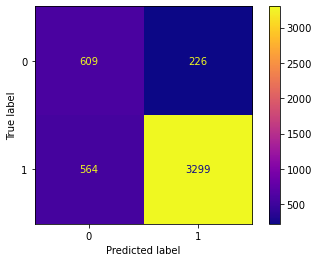

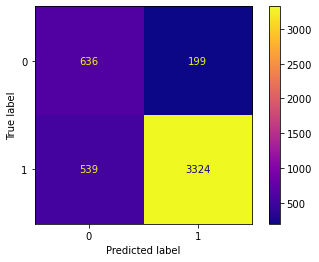

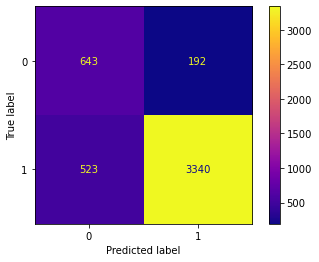

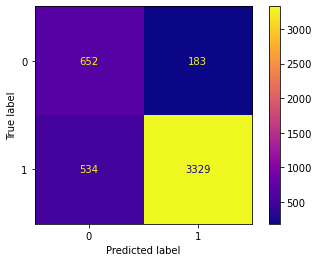

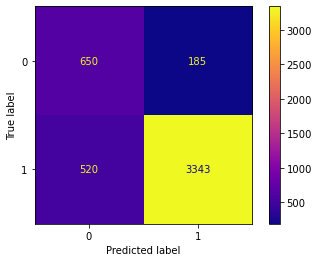

In [68]:
from sklearn.ensemble import RandomForestClassifier
for c in [50,100,150,200,250]:
    random_count= RandomForestClassifier(n_estimators = c,max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1) 
    random_count.fit(X_train_count, y_train)
    print("Random_Count Model Estimator ",c)
    print("---------------")
    eval(random_count, X_train_count, X_test_count)

#N_estimator=200 gives best balanced result.